<a href="https://colab.research.google.com/github/Raul-rx7/projeto_circuitos_rc/blob/main/pre_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensino de Circuitos-RC Usando Python

O conteúdo de circuito R-C é parte fundamental no ensino de eletromagnetismo, pois o mesmo abre espaço para melhor compreensão do comportamento de resistores e capacitores, como funciona o efeito joule no resistor e como o valor da capacitância influencia no armazenamento de energia. Essas ideias precisam ser passadas de maneira que os alunos possam compreender melhor o conteúdo. Então, visando contribuir para as boas práticas de ensino de física, o presente trabalho tem como objetivo apresentar um produto educacional para auxiliar o ensino de circuitos R-C utilizando a linguagem de programação python, por meio da análise de gráficos a partir das simulações realizadas.

In [1]:
# 1º PASSO: Rodar os códigos de importação das bibliotecas necessárias
# Obs.: Não rodar as próximas células de códigos sem rodar essa primeiro.
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Circuitos RC: uma breve revisão

- Carregando o capacitor:
$$q = cv(1 - e^{-t/T})$$

$$i = \frac{v}{R} e^{-t/T}$$

- Descarregando o capacitor:
$$q_{2} = Q_{0} e^{-t/T}$$


$$i_{2} = -\frac{Q_{0}}{RC} e^{-t/T} = I_{0}e^{-t/T}$$

- Lembrando alguns prefixos para as potências de dez: 
  - $k$ (kilo) : $10^{3}$
  - $c$ (centi) : $10^{-2}$
  - $m$ (mili) : $10^{-3}$
  - $\mu$ (micro) : $10^{-6}$
  - $n$ (nano) : $10^{-9}$
  - $p$ (pico) : $10^{-12}$
  - $f$ (femto) : $10^{-15}$

In [2]:
# 2º PASSO:

############### DEFINIÇÃO DAS FUNÇÕES DESCRITAS ACIMA ################ 
#  OBS.: AS FUNÇÕES ABAIXO PODEM SER UTILIZADAS A QUALQUER MOMENTO   #
######################################################################

# Circuito R-C
# Carregando um capacitor:
def Q(c, r, v, t):
  return (c*v)*(1 - np.exp(-t/(r*c)))


# Corrente instantânea
def I(c, r, v, t):
  return v*(np.exp(-t/(r*c)))/r


# Descarregando um capacitor:
def Q2(c, r, v, t):
  #      Q0 : ponto de partida (ao carregar) 
  return Q(c, r, v, t).max()*np.exp(-t/(r*c))


# Corrente instantânea
def I2(c, r, v, t):
  return -Q2(c, r, v, t)/(r*c)

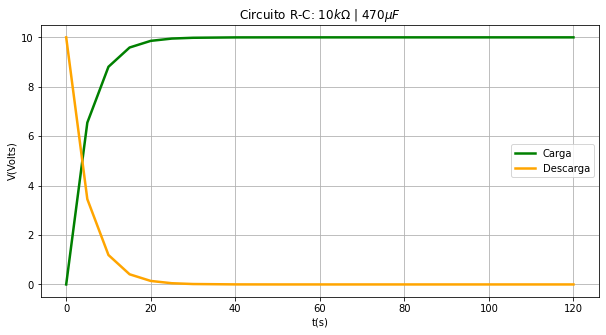

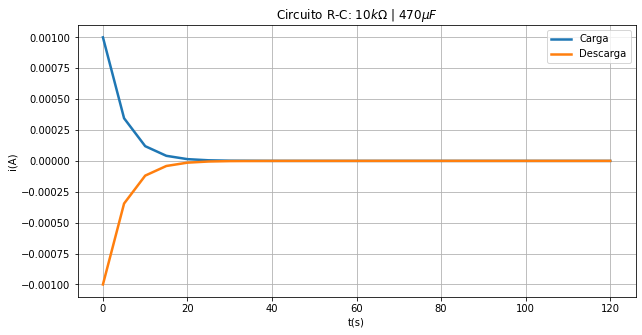

In [16]:
# PROCEDIMENTO 1: 10 kOhms e 470 uF/10V
# 3º PASSO: Simulações de carga e descarga do capacitor.

# É preciso indicar os valores de capacitância (C), resistência (R), voltagem (V) e o 
# tempo de observação (t), para simulação de carga e descarga.

# Obs.: Atenção com as unidades de medidas e potências de dez!
 
C = 470*(10**(-6))        # Farad
R = 10*(10**(3))          # Ohms
V = 10                    # Volts

# Passo do tempo para simulação
t = np.array(list(np.arange(0, 35, 5)) + list(np.arange(40, 90, 10)) + [100, 120])

q = Q(C, R, V, t)         # Chamando a função de carga no carregamento
i = I(C, R, V, t)         # Chamando a função de corrente no carregamento 

q2 = Q2(C, R, V, t)       # Chamando a função de carga no descarregamento
i2 = I2(C, R, V, t)       # Chamando a função de corrente no descarregamento

# Carga e descarga sob o ponto de vista da d.d.p.
fig = plt.figure(figsize=(10, 5))
plt.plot(t, q/C, color="green", label="Carga", linewidth=2.5) # Vc = q/C
plt.plot(t, q2/C, color="orange", label="Descarga", linewidth=2.5)
plt.xlabel("t(s)")
plt.ylabel("V(Volts)")
plt.title(r"Circuito R-C: $10 k\Omega \ | \ 470 \mu F$")
plt.grid()
plt.legend(loc=0)
plt.show()
fig.savefig('fig1.png') # Formatos: (.png) ; (.jpg) ; (.pdf), por exemplo.
plt.close()


# Carga e descarga sob o ponto de vista da corrente.
fig = plt.figure(figsize=(10, 5))
plt.plot(t, i, label= "Carga", linewidth=2.5)
plt.plot(t, i2, label= "Descarga", linewidth=2.5)

plt.xlabel("t(s)")
plt.ylabel("i(A)")
plt.title(r"Circuito R-C: $10 k\Omega \ | \ 470 \mu F$")
plt.grid()
plt.legend(loc=0)
plt.show()
fig.savefig('fig2.png')
plt.close()

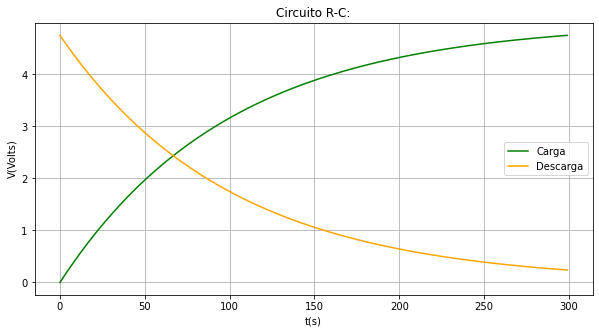

In [ ]:
# 3º PASSO: Simulações de carga e descarga do capacitor.

# É preciso indicar os valores de capacitância (C), resistência (R), voltagem (V) e o 
# tempo de observação (t), para simulação de carga e descarga.

# Obs.: Atenção com as unidades de medidas e potências de dez!
 
C = 1*(10**(-2))          # Farad
R = 10*(10**(3))          # Ohms
V = 5                     # Volts
t = np.arange(0, 300, 1)  # 300 segs

q = Q(C, R, V, t)         # Chamando a função de carga no carregamento
i = I(C, R, V, t)         # Chamando a função de corrente no carregamento 

q2 = Q2(C, R, V, t)       # Chamando a função de carga no descarregamento
i2 = I2(C, R, V, t)       # Chamando a função de corrente no descarregamento

# Carga e descarga sob o ponto de vista da d.d.p.
fig = plt.figure(figsize=(10,5))
plt.plot(t, q/C, color="green", label="Carga") # Vc = q/C
plt.plot(t, q2/C, color="orange", label="Descarga")
plt.xlabel("t(s)")
plt.ylabel("V(Volts)")
plt.title("Circuito R-C:")
plt.grid()
plt.legend(loc=0)
plt.show()
fig.savefig('fig1.png') # Formatos: (.png) ; (.jpg) ; (.pdf), por exemplo.
plt.close()

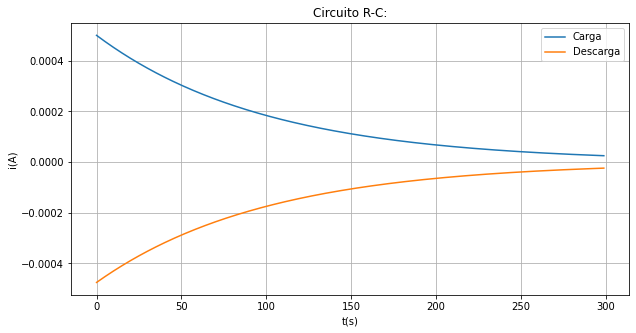

In [ ]:
# Carga e descarga sob o ponto de vista da corrente.
fig = plt.figure(figsize=(10,5))
plt.plot(t, i, label= "Carga")
plt.plot(t, i2, label= "Descarga")

plt.xlabel("t(s)")
plt.ylabel("i(A)")
plt.title("Circuito R-C:")
plt.grid()
plt.legend(loc=0)
plt.show()
fig.savefig('fig2.png')
plt.close()

### Resultados da teoria
- Acima segue as simulações realizadas a partir da teoria;
- Note que os parâmetros (os dados) podem ser modificados, tais como a **capacitância**, **resistência** e **ddp**, assim como **tempo (seg)** de observação da simulação.

---
## Resultados na prática

### Procedimento 1: $10 kΩ$ e $470 μF / 10 V$;
### Procedimento 2: $33 kΩ$ e $1200 μF / 10 V$;
Os seguintes resultados foram obtidos a partir da coleta de dados nas simulações no ambiente do [laboratório virtual de Física da UFC](https://www.laboratoriovirtual.fisica.ufc.br/simulacoes).

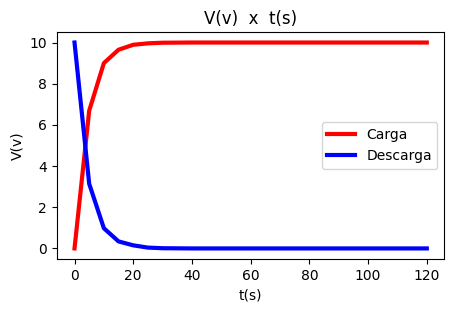

In [3]:
# NA PRÁTICA
# PROCEDIMENTO 1:
dadosCarga1 = pd.DataFrame({'t': [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120],
                    'v': [0, 6.69, 9.00, 9.65, 9.89, 9.96, 9.99, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00]})

dadosDescarga1 = pd.DataFrame({'t': [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120], 
                     'v': [10, 3.14, 0.98, 0.34, 0.15, 0.04, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]})


fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(dadosCarga1['t'], dadosCarga1['v'], 'r-', label='Carga',lw = 3)
ax.plot(dadosDescarga1['t'], dadosDescarga1['v'], 'b-' , label='Descarga',lw = 3)
ax.set_xlabel('t(s)')
ax.set_ylabel('V(v)')
ax.set_title('V(v)  x  t(s)')
ax.legend(loc=0)
fig.savefig('v_t');

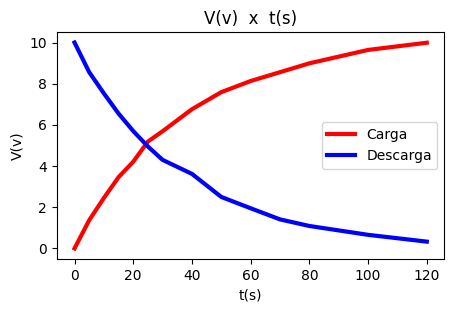

In [4]:
# NA PRÁTICA
# PROCEDIMENTO 2:
dadosCarga2 = pd.DataFrame({'t': [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120],
                    'v': [0.00, 1.37, 2.45, 3.46, 4.21, 5.19, 5.69, 6.76, 7.59, 8.13, 8.56, 8.99, 9.64, 9.99]})

dadosDescarga2 = pd.DataFrame({'t': [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120], 
                     'v': [10, 8.56, 7.53, 6.55, 5.70, 4.95, 4.30, 3.62, 2.50, 1.95, 1.41, 1.09, 0.66, 0.33]})


fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(dadosCarga2['t'], dadosCarga2['v'], 'r-', label='Carga',lw = 3)
ax.plot(dadosDescarga2['t'], dadosDescarga2['v'], 'b-' , label='Descarga',lw = 3)
ax.set_xlabel('t(s)')
ax.set_ylabel('V(v)')
ax.set_title('V(v)  x  t(s)')
ax.legend(loc=0)
fig.savefig('v_t');

Observe que os gráficos são semelhantes, de maneira que comprova a eficácia da codificação escrita baseada na teoria.

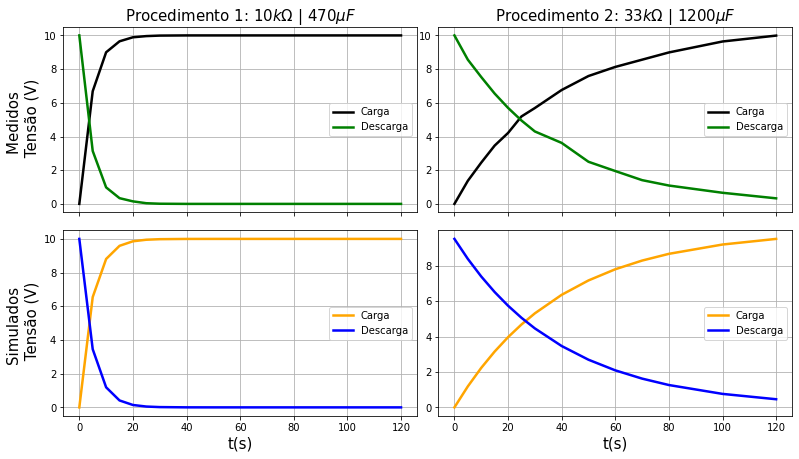

In [5]:
lW=2.5
fontSize = 15

# Parâmetros para simulação 
C1 = 470*(10**(-6))        # Farad
R1 = 10*(10**(3))          # Ohms
V = 10                    # Volts

C2 = 1200*(10**(-6))        # Farad
R2 = 33*(10**(3))          # Ohms

# Passo do tempo para simulação
t = np.array(list(np.arange(0, 35, 5)) + list(np.arange(40, 90, 10)) + [100, 120])

# Simulação
q1 = Q(C1, R1, V, t)         # Chamando a função de carga no carregamento
i1 = I(C1, R1, V, t)         # Chamando a função de corrente no carregamento 

qD1 = Q2(C1, R1, V, t)         # Chamando a função de carga no descarregamento
iD1 = I2(C1, R1, V, t)         # Chamando a função de corrente no descarregamento


q2 = Q(C2, R2, V, t)         # Chamando a função de carga no carregamento
i2 = I(C2, R2, V, t)         # Chamando a função de corrente no carregamento 

qD2 = Q2(C2, R2, V, t)         # Chamando a função de carga no descarregamento
iD2 = I2(C2, R2, V, t)         # Chamando a função de corrente no descarregamento



### Plotando tudo de uma vez
figure, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8), sharex=True)
figure.subplots_adjust(hspace=0.098, wspace = 0.06)
plt.subplots_adjust(right=.8, top=.8)

axs[0][0].set_title(r"Procedimento 1: $10 k\Omega \ | \ 470 \mu F$", fontsize=fontSize)
axs[0][0].plot(dadosCarga1["t"], dadosCarga1["v"], "k", label="Carga", lw = lW)
axs[0][0].plot(dadosDescarga1["t"], dadosDescarga1["v"], "green" , label="Descarga", lw = lW)
axs[0][0].set_ylabel("Medidos \n Tensão (V)", fontsize=fontSize)
axs[0][0].grid()
axs[0][0].legend()


axs[1][0].plot(t, q1/C1, color="orange", label="Carga", linewidth=lW)
axs[1][0].plot(t, qD1/C1, color="blue", label="Descarga", linewidth=lW)
axs[1][0].set_xlabel("t(s)", fontsize=fontSize)
axs[1][0].set_ylabel("Simulados \n Tensão (V)", fontsize=fontSize)
axs[1][0].grid()
axs[1][0].legend()


axs[0][1].set_title(r"Procedimento 2: $33 k\Omega \ | \ 1200 \mu F$", fontsize=fontSize)
axs[0][1].plot(dadosCarga2["t"], dadosCarga2["v"], "k", label="Carga", lw = lW)
axs[0][1].plot(dadosDescarga2["t"], dadosDescarga2["v"], "green" , label="Descarga", lw = lW)
axs[0][1].grid()
axs[0][1].legend()


axs[1][1].plot(t, q2/C2, color="orange", label="Carga", linewidth=lW)
axs[1][1].plot(t, qD2/C2, color="blue", label="Descarga", linewidth=lW)
axs[1][1].set_xlabel("t(s)", fontsize=fontSize)
axs[1][1].grid()
axs[1][1].legend()

figure.savefig("medidos_simulados.pdf")

#plt.grid()
#plt.legend(loc=0)
#plt.show()
#plt.close()

In [15]:
residCarga1 = dadosCarga1['v'] - (q1/C1)
residDescarga1 = dadosDescarga1['v'] - (qD1/C1)

residCarga2 = dadosCarga2['v'] - (q2/C2)
residDescarga2 = dadosDescarga2['v'] - (qD2/C2)

print("PROCEDIMENTO 1:\n Resíduo Médio (Carga) = {:.4f}\n Desvio padrão = {}\n".format(residCarga1.mean(), np.std(residCarga1)))
print("PROCEDIMENTO 1:\n Resíduo Médio (Descarga) = {:.4f}\n Desvio padrão = {:.4f}\n".format(residDescarga1.mean(), np.std(residDescarga1)))
print("PROCEDIMENTO 2:\n Resíduo Médio (Carga) = {:.4f}\n Desvio padrão = {:.4f}\n".format(residCarga2.mean(), np.std(residCarga2)))
print("PROCEDIMENTO 2:\n Resíduo Médio (Descarga) = {:.4f}\n Desvio padrão = {:.4f}\n".format(residDescarga2.mean(), np.std(residDescarga2)))

PROCEDIMENTO 1:
 Resíduo Médio (Carga) = 0.0317
 Desvio padrão = 0.058148151366311074

PROCEDIMENTO 1:
 Resíduo Médio (Descarga) = -0.0431
 Desvio padrão = 0.0929

PROCEDIMENTO 2:
 Resíduo Médio (Carga) = 0.3205
 Desvio padrão = 0.1291

PROCEDIMENTO 2:
 Resíduo Médio (Descarga) = -0.0207
 Desvio padrão = 0.1892



(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 2., 1.,
        0., 1., 1., 1., 1., 0., 1., 1.]),
 array([0.        , 0.02035716, 0.04071432, 0.06107148, 0.08142864,
        0.10178579, 0.12214295, 0.14250011, 0.16285727, 0.18321443,
        0.20357159, 0.22392875, 0.24428591, 0.26464306, 0.28500022,
        0.30535738, 0.32571454, 0.3460717 , 0.36642886, 0.38678602,
        0.40714318, 0.42750033, 0.44785749, 0.46821465, 0.48857181,
        0.50892897]),
 <a list of 25 Patch objects>)

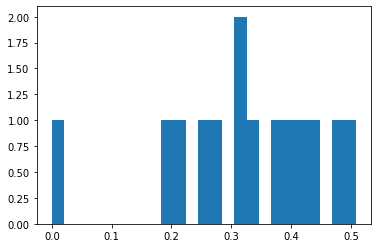

---
## EXEMPLO 27.12 - Sears e Zemansky - Física III - Young & Freedman - 10ª edição
####Carregando um capacitor
Um resistor com resistências 10 M$Ω$ é conectado em série com um capacitor cuja capacitância é de 1,0 $\mu$F e com uma bateria de fem igual a 12 V. Antes de a chave ser fechada no instante t = 0, o capacitor está descarregado. 

a) Qual é a constante de tempo? 

b) Qual é a fração da carga final que está sobre uma das placas quando $t = 46 s$?

c)Qual é a fração da corrente inicial que permanece quando t = 46 s? 

In [ ]:
# As funções definidas no 2ª passo, podem ser utilizadas aqui também.
# Primeiro é preciso definir a resistência, capacitância e tempo.
R = 10*10**6 
C = 10**(-6)
V = 12
t = 46  # No instante 46 seg. 


print(f"Solução\na) {R*C}")
print(f"b) {Q(C, R, V, t)/(C*V)}")
print(f"c) {I(C, R, V, t)/(V/R)}")

Solução
a) 10.0
b) 0.9899481642553665
c) 0.010051835744633588 = 1.0051835744633588 


Depois de um tempo igual a 4,6 constantes de tempo, a corrente diminui para 1% do seu valor inicial.